In [6]:
import numpy as np
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
from keras.layers import Input, Dense, GaussianNoise, BatchNormalization, Lambda, LayerNormalization
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model
from keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
import keras.models as models
import random as rn
from keras import backend as K
from keras.models import load_model
import matplotlib.pyplot as plt
from numpy import loadtxt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
# from keras.optimizers import Adam
from keras.layers import Dropout 
import matplotlib.pyplot as plt
from keras.utils import np_utils
# for reproducing results
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed 
set_seed(3)
import math
import csv
import random
import time
from keras.layers import Lambda
from keras import backend as K
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

plt.rcParams["figure.figsize"] = (4.3,2.8)
plt.rcParams.update({'font.size': 8})
plt.rcParams['lines.linewidth'] = 1

plt.rcParams['lines.markersize'] = 4

import tensorflow.keras.backend as K
from sklearn.neighbors import KernelDensity
from sklearn.utils import shuffle
from keras.callbacks import ModelCheckpoint
print(10)

10


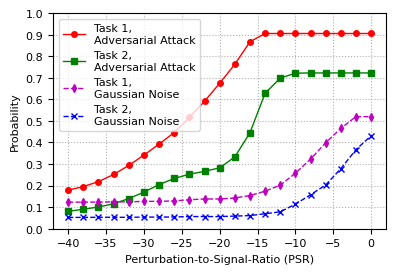

In [25]:
# Untargeted CNN

untargeted_success_vec1 =  [0.081, 0.09, 0.101, 0.1155, 0.14, 0.1695, 0.205, 0.233, 0.253, 0.266, 0.2825, 0.333, 0.445, 0.6285, 0.6985, 0.7215, 0.7225, 0.7225, 0.7225, 0.7225, 0.7225]
untargeted_success_vec2 =  [0.179, 0.1955, 0.2185, 0.2515, 0.2935, 0.3415, 0.3925, 0.446, 0.516, 0.591, 0.6745, 0.7625, 0.867, 0.9055, 0.9055, 0.9055, 0.9055, 0.9055, 0.9055, 0.9055, 0.9055]
untargeted_success_vecG1 =  [0.0525, 0.0525, 0.053, 0.053, 0.053, 0.054, 0.054, 0.0545, 0.0565, 0.0565, 0.0565, 0.0585, 0.061, 0.0695, 0.0785, 0.114, 0.1575, 0.203, 0.2785, 0.367, 0.4315]
untargeted_success_vecG2 =  [0.123, 0.1235, 0.1235, 0.1245, 0.1245, 0.127, 0.127, 0.129, 0.1345, 0.138, 0.138, 0.1425, 0.154, 0.174, 0.202, 0.2575, 0.323, 0.3985, 0.4655, 0.52, 0.52]

dBrange = -40
# plt.rc('font', size=10) 
fig = plt.figure()
plt.plot(range(dBrange , 1, 2), untargeted_success_vec2, 'ro-', label = 'Task 1,\nAdversarial Attack')
plt.plot(range(dBrange , 1, 2), untargeted_success_vec1, 'gs-', label = 'Task 2,\nAdversarial Attack')
plt.plot(range(dBrange , 1, 2), untargeted_success_vecG2, 'md--', label = 'Task 1,\nGaussian Noise')
plt.plot(range(dBrange , 1, 2), untargeted_success_vecG1, 'bx--', label = 'Task 2,\nGaussian Noise')
# plt.plot(range(dBrange , 1, 2), class1perf_vec, 'md-', label = 'Classifier 1, After Defense')
# # plt.plot(range(dBrange , 1, 2), class2perf_vec, 'bs-', label = 'Classifier 2, After Defense')
# plt.plot(range(dBrange , 1, 2), class3perf_vec, 'bs-', label = 'Classifier 1, Accuracy of Clean Samples After Defense')
# # plt.plot(range(dBrange , 1, 2), class4perf_vec, 'bs-', label = 'Classifier 2, Accuracy of Clean SamplesAfter Defense')

plt.legend(loc="upper left")
# plt.legend(bbox_to_anchor=(0.01, 0.01), loc="lower left", borderaxespad=0)
plt.xlabel('Perturbation-to-Signal-Ratio (PSR)')
plt.ylabel('Probability')
plt.grid(linestyle='dotted')
aa = plt.xticks(np.arange(dBrange,0+0.1, 5)) 
bb = plt.yticks(np.arange(0,1+0.1, 0.1)) 

plt.savefig('multitask_untargeted_CNN_updated.pdf', bbox_inches="tight") 

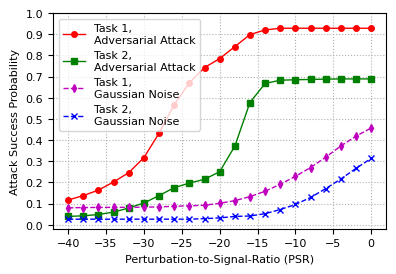

In [20]:
# Untargeted FNN

# untargeted_success_vec1 =  [0.0625, 0.0685, 0.0805, 0.108, 0.14, 0.185, 0.2465, 0.326, 0.4145, 0.5155, 0.618, 0.7175, 0.8055, 0.886, 0.933, 0.9505, 0.961, 0.9635, 0.9635, 0.9635, 0.9635]
# untargeted_success_vec2 =  [0.304, 0.3065, 0.313, 0.318, 0.3265, 0.3435, 0.3695, 0.393, 0.4245, 0.4565, 0.4805, 0.5145, 0.605, 0.659, 0.679, 0.679, 0.679, 0.679, 0.679, 0.679, 0.679]
# untargeted_success_vecG1 =  [0.0435, 0.0445, 0.0445, 0.0445, 0.0455, 0.048, 0.048, 0.048, 0.0495, 0.055, 0.059, 0.0675, 0.079, 0.0985, 0.1215, 0.1485, 0.186, 0.2415, 0.2935, 0.3425, 0.389]
# untargeted_success_vecG2 =  [0.2915, 0.2915, 0.2915, 0.2915, 0.292, 0.292, 0.2925, 0.2935, 0.2945, 0.2945, 0.297, 0.3025, 0.31, 0.317, 0.334, 0.3535, 0.3815, 0.4115, 0.4375, 0.466, 0.483]

untargeted_success_vec1 =  [0.039, 0.042, 0.048, 0.0595, 0.079, 0.1025, 0.1375, 0.175, 0.1965, 0.2145, 0.2505, 0.371, 0.5775, 0.6675, 0.683, 0.685, 0.6865, 0.688, 0.689, 0.689, 0.689]
untargeted_success_vec2 =  [0.1165, 0.1375, 0.1635, 0.202, 0.246, 0.317, 0.4325, 0.5675, 0.6705, 0.7425, 0.785, 0.8415, 0.8985, 0.9205, 0.9285, 0.9285, 0.9285, 0.9285, 0.9285, 0.9285, 0.9285]
untargeted_success_vecG1 =  [0.026, 0.026, 0.026, 0.026, 0.026, 0.026, 0.026, 0.026, 0.026, 0.0285, 0.032, 0.039, 0.041, 0.052, 0.0715, 0.0955, 0.1285, 0.1705, 0.216, 0.266, 0.313]
untargeted_success_vecG2 =  [0.0795, 0.081, 0.0815, 0.082, 0.082, 0.0825, 0.084, 0.087, 0.089, 0.092, 0.101, 0.1135, 0.1325, 0.158, 0.191, 0.2285, 0.27, 0.319, 0.372, 0.4185, 0.457]


dBrange = -40
# plt.rc('font', size=10) 
fig = plt.figure()
plt.plot(range(dBrange , 1, 2), untargeted_success_vec2, 'ro-', label = 'Task 1,\nAdversarial Attack')
plt.plot(range(dBrange , 1, 2), untargeted_success_vec1, 'gs-', label = 'Task 2,\nAdversarial Attack')
plt.plot(range(dBrange , 1, 2), untargeted_success_vecG2, 'md--', label = 'Task 1,\nGaussian Noise')
plt.plot(range(dBrange , 1, 2), untargeted_success_vecG1, 'bx--', label = 'Task 2,\nGaussian Noise')
# plt.plot(range(dBrange , 1, 2), class1perf_vec, 'md-', label = 'Classifier 1, After Defense')
# # plt.plot(range(dBrange , 1, 2), class2perf_vec, 'bs-', label = 'Classifier 2, After Defense')
# plt.plot(range(dBrange , 1, 2), class3perf_vec, 'bs-', label = 'Classifier 1, Accuracy of Clean Samples After Defense')
# # plt.plot(range(dBrange , 1, 2), class4perf_vec, 'bs-', label = 'Classifier 2, Accuracy of Clean SamplesAfter Defense')

plt.legend(loc="upper left")
# plt.legend(bbox_to_anchor=(0.01, 0.01), loc="lower left", borderaxespad=0)
plt.xlabel('Perturbation-to-Signal-Ratio (PSR)')
plt.ylabel('Attack Success Probability')
plt.grid(linestyle='dotted')
aa = plt.xticks(np.arange(dBrange,0+0.1, 5)) 
bb = plt.yticks(np.arange(0,1+0.1, 0.1)) 

plt.savefig('multitask_untargeted_FNN_updated.pdf', bbox_inches="tight") 

In [84]:
# Defense Untargeted CNN, PSR = -3dB

# attack success on classifier 1 before defense =  0.7225
# attack success on classifier 2 before defense =  0.9055

# attack success on classifier 1 after defense = 0.060025
# attack success on classifier 2 after defense = 0.061175

# classifier 1 accuracy on cleane samples after defense = 0.950025
# classifier 2 accuracy on cleane samples after defense = 0.89415


# Defense Untargeted FNN, PSR = -3dB

# attack success on classifier 1 before defense =  0.9505
# attack success on classifier 2 before defense =  0.6790

# attack success on classifier 1 after defense = 0.011475
# attack success on classifier 2 after defense = 0.16655

# classifier 1 accuracy on cleane samples after defense = 0.970075
# classifier 2 accuracy on cleane samples after defense = 0.90155



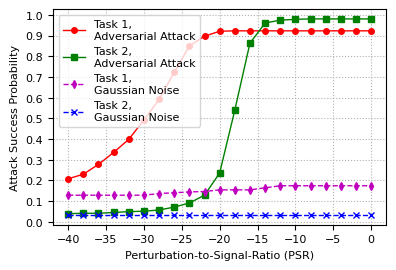

In [27]:
# Targeted CNN

untargeted_success_vec1 =  [0.03968253968253968, 0.041666666666666664, 0.041666666666666664, 0.04563492063492063, 0.0496031746031746, 0.051587301587301584, 0.057539682539682536, 0.07142857142857142, 0.09126984126984126, 0.12896825396825398, 0.2361111111111111, 0.5396825396825397, 0.8630952380952381, 0.9603174603174603, 0.9742063492063492, 0.9781746031746031, 0.9801587301587301, 0.9801587301587301, 0.9801587301587301, 0.9801587301587301, 0.9801587301587301]
untargeted_success_vec2 =  [0.20833333333333334, 0.23015873015873015, 0.2777777777777778, 0.3353174603174603, 0.39880952380952384, 0.49206349206349204, 0.5912698412698413, 0.7222222222222222, 0.8492063492063492, 0.8968253968253969, 0.9206349206349206, 0.9226190476190477, 0.9226190476190477, 0.9226190476190477, 0.9226190476190477, 0.9226190476190477, 0.9226190476190477, 0.9226190476190477, 0.9226190476190477, 0.9226190476190477, 0.9226190476190477]
untargeted_success_vecG1 =  [0.03373015873015873, 0.03373015873015873, 0.03373015873015873, 0.03373015873015873, 0.03373015873015873, 0.03373015873015873, 0.03373015873015873, 0.03373015873015873, 0.03373015873015873, 0.03373015873015873, 0.03373015873015873, 0.03373015873015873, 0.03373015873015873, 0.03373015873015873, 0.03373015873015873, 0.03373015873015873, 0.03373015873015873, 0.03373015873015873, 0.03373015873015873, 0.03373015873015873, 0.03373015873015873]
untargeted_success_vecG2 =  [0.12896825396825398, 0.12896825396825398, 0.12896825396825398, 0.12896825396825398, 0.12896825396825398, 0.12896825396825398, 0.13690476190476192, 0.14087301587301587, 0.14484126984126985, 0.14682539682539683, 0.15476190476190477, 0.15476190476190477, 0.15476190476190477, 0.16468253968253968, 0.1746031746031746, 0.1746031746031746, 0.1746031746031746, 0.1746031746031746, 0.1746031746031746, 0.1746031746031746, 0.1746031746031746]

dBrange = -40
# plt.rc('font', size=10) 
fig = plt.figure()
plt.plot(range(dBrange , 1, 2), untargeted_success_vec2, 'ro-', label = 'Task 1,\nAdversarial Attack')
plt.plot(range(dBrange , 1, 2), untargeted_success_vec1, 'gs-', label = 'Task 2,\nAdversarial Attack')
plt.plot(range(dBrange , 1, 2), untargeted_success_vecG2, 'md--', label = 'Task 1,\nGaussian Noise')
plt.plot(range(dBrange , 1, 2), untargeted_success_vecG1, 'bx--', label = 'Task 2,\nGaussian Noise')
# plt.plot(range(dBrange , 1, 2), class1perf_vec, 'md-', label = 'Classifier 1, After Defense')
# # plt.plot(range(dBrange , 1, 2), class2perf_vec, 'bs-', label = 'Classifier 2, After Defense')
# plt.plot(range(dBrange , 1, 2), class3perf_vec, 'bs-', label = 'Classifier 1, Accuracy of Clean Samples After Defense')
# # plt.plot(range(dBrange , 1, 2), class4perf_vec, 'bs-', label = 'Classifier 2, Accuracy of Clean SamplesAfter Defense')

plt.legend(loc="upper left")
# plt.legend(bbox_to_anchor=(0.01, 0.01), loc="lower left", borderaxespad=0)
plt.xlabel('Perturbation-to-Signal-Ratio (PSR)')
plt.ylabel('Attack Success Probability')
plt.grid(linestyle='dotted')
aa = plt.xticks(np.arange(dBrange,0+0.1, 5)) 
bb = plt.yticks(np.arange(0,1+0.1, 0.1)) 

plt.savefig('multitask_targeted_CNN_updated.pdf', bbox_inches="tight") 

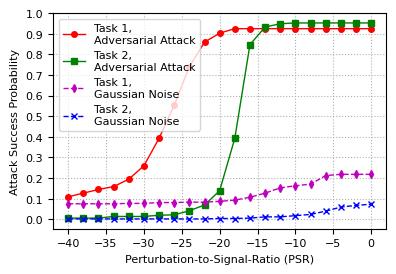

In [24]:
# Targeted FNN

# untargeted_success_vec1 =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001984126984126984, 0.001984126984126984, 0.013888888888888888, 0.0496031746031746, 0.2123015873015873, 0.5198412698412699, 0.7380952380952381, 0.8452380952380952, 0.9047619047619048, 0.9246031746031746, 0.9246031746031746, 0.9246031746031746, 0.9246031746031746, 0.9246031746031746]
# untargeted_success_vec2 =  [0.1884920634920635, 0.20238095238095238, 0.22420634920634921, 0.25595238095238093, 0.3115079365079365, 0.3968253968253968, 0.49206349206349204, 0.6091269841269841, 0.7341269841269841, 0.8551587301587301, 0.9226190476190477, 0.9583333333333334, 0.9880952380952381, 0.9940476190476191, 0.998015873015873, 0.998015873015873, 0.998015873015873, 0.998015873015873, 0.998015873015873, 0.998015873015873, 0.998015873015873]
# untargeted_success_vecG1 =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001984126984126984, 0.007936507936507936, 0.007936507936507936, 0.015873015873015872, 0.023809523809523808, 0.03373015873015873, 0.037698412698412696]
# untargeted_success_vecG2 =  [0.1349206349206349, 0.1349206349206349, 0.1349206349206349, 0.1388888888888889, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.15476190476190477, 0.16468253968253968, 0.1746031746031746, 0.1746031746031746, 0.19047619047619047, 0.19642857142857142, 0.20436507936507936, 0.20436507936507936, 0.20436507936507936, 0.20436507936507936, 0.20436507936507936, 0.20436507936507936]

untargeted_success_vec1 =  [0.005952380952380952, 0.005952380952380952, 0.005952380952380952, 0.013888888888888888, 0.013888888888888888, 0.013888888888888888, 0.01984126984126984, 0.021825396825396824, 0.041666666666666664, 0.06944444444444445, 0.1388888888888889, 0.39285714285714285, 0.8472222222222222, 0.9325396825396826, 0.9484126984126984, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523]
untargeted_success_vec2 =  [0.10912698412698413, 0.12698412698412698, 0.14484126984126985, 0.15873015873015872, 0.19444444444444445, 0.25992063492063494, 0.39285714285714285, 0.5535714285714286, 0.7400793650793651, 0.8591269841269841, 0.9027777777777778, 0.9246031746031746, 0.9246031746031746, 0.9246031746031746, 0.9246031746031746, 0.9246031746031746, 0.9246031746031746, 0.9246031746031746, 0.9246031746031746, 0.9246031746031746, 0.9246031746031746]
untargeted_success_vecG1 =  [0.001984126984126984, 0.001984126984126984, 0.001984126984126984, 0.001984126984126984, 0.001984126984126984, 0.001984126984126984, 0.001984126984126984, 0.001984126984126984, 0.001984126984126984, 0.001984126984126984, 0.003968253968253968, 0.003968253968253968, 0.005952380952380952, 0.011904761904761904, 0.011904761904761904, 0.017857142857142856, 0.023809523809523808, 0.03968253968253968, 0.05952380952380952, 0.06746031746031746, 0.07341269841269842]
untargeted_success_vecG2 =  [0.07539682539682539, 0.07539682539682539, 0.07539682539682539, 0.07539682539682539, 0.07738095238095238, 0.07738095238095238, 0.08134920634920635, 0.08134920634920635, 0.08333333333333333, 0.08333333333333333, 0.0873015873015873, 0.09325396825396826, 0.10714285714285714, 0.12698412698412698, 0.1527777777777778, 0.1626984126984127, 0.17063492063492064, 0.2123015873015873, 0.21825396825396826, 0.21825396825396826, 0.21825396825396826]


dBrange = -40
# plt.rc('font', size=10) 
fig = plt.figure()
plt.plot(range(dBrange , 1, 2), untargeted_success_vec2, 'ro-', label = 'Task 1,\nAdversarial Attack')
plt.plot(range(dBrange , 1, 2), untargeted_success_vec1, 'gs-', label = 'Task 2,\nAdversarial Attack')
plt.plot(range(dBrange , 1, 2), untargeted_success_vecG2, 'md--', label = 'Task 1,\nGaussian Noise')
plt.plot(range(dBrange , 1, 2), untargeted_success_vecG1, 'bx--', label = 'Task 2,\nGaussian Noise')
# plt.plot(range(dBrange , 1, 2), class1perf_vec, 'md-', label = 'Classifier 1, After Defense')
# # plt.plot(range(dBrange , 1, 2), class2perf_vec, 'bs-', label = 'Classifier 2, After Defense')
# plt.plot(range(dBrange , 1, 2), class3perf_vec, 'bs-', label = 'Classifier 1, Accuracy of Clean Samples After Defense')
# # plt.plot(range(dBrange , 1, 2), class4perf_vec, 'bs-', label = 'Classifier 2, Accuracy of Clean SamplesAfter Defense')

plt.legend(loc="upper left")
# plt.legend(bbox_to_anchor=(0.01, 0.01), loc="lower left", borderaxespad=0)
plt.xlabel('Perturbation-to-Signal-Ratio (PSR)')
plt.ylabel('Attack Success Probability')
plt.grid(linestyle='dotted')
aa = plt.xticks(np.arange(dBrange,0+0.1, 5)) 
bb = plt.yticks(np.arange(0,1+0.1, 0.1)) 

plt.savefig('multitask_targeted_FNN_updated.pdf', bbox_inches="tight") 

In [ ]:
# Multi-task
# Defense Targeted CNN, PSR = -10dB

# attack success on classifier 1 before defense =  0.9782
# attack success on classifier 2 before defense =  0.9226

# OLD:
# attack success on classifier 1 after defense = 0.0579
# attack success on classifier 2 after defense = 0.0615

# classifier 1 accuracy on cleane samples after defense = 0.9501
# classifier 2 accuracy on cleane samples after defense = 0.8874


# Defense Targeted FNN, PSR = -10dB

# attack success on classifier 1 before defense =  0.90476 
# attack success on classifier 2 before defense =  0.9980

# OLD
# attack success on classifier 1 after defense = 0.0117
# attack success on classifier 2 after defense = 0.1655 

# classifier 1 accuracy on cleane samples after defense = 0.9682
# classifier 2 accuracy on cleane samples after defense = 0.9036

In [ ]:
Single Task

DNNtype = 'CNN'
cons_A = 1
attack_class = 1

PNR = -3

a = [0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987, 0.987]
b = [0.9549999833106995, 0.9599999785423279, 0.9574999809265137, 0.9629999995231628, 0.9610000252723694, 0.9629999995231628, 0.9614999890327454, 0.9585000276565552, 0.9564999938011169, 0.9660000205039978]
c = [0.003, 0.0045, 0.002, 0.002, 0.0035, 0.002, 0.0015, 0.004, 0.0035, 0.0025]

0.9869999999999999
0.9601999998092652
0.0028499999999999997

attack_class = 2


[0.4625, 0.4625, 0.4625, 0.4625, 0.4625, 0.4625, 0.4625, 0.4625, 0.4625, 0.4625]
[0.9580000042915344, 0.9495000243186951, 0.9474999904632568, 0.9620000123977661, 0.9549999833106995, 0.9549999833106995, 0.9605000019073486, 0.9570000171661377, 0.9555000066757202, 0.9524999856948853]
[0.003, 0.003, 0.004, 0.001, 0.0025, 0.004, 0.0015, 0.003, 0.005, 0.004]

0.4625000000000001
0.9552500009536743
0.0031


PNR = -10
a = [0.9825, 0.9825, 0.9825, 0.9825, 0.9825, 0.9825, 0.9825, 0.9825, 0.9825, 0.9825]
b = [0.9204999804496765, 0.8289999961853027, 0.8629999756813049, 0.8880000114440918, 0.8019999861717224, 0.8464999794960022, 0.9144999980926514, 0.8815000057220459, 0.8715000152587891]
c = [0.086, 0.0785, 0.053, 0.0855, 0.062, 0.061, 0.0855, 0.1835, 0.0775]

0.9825000000000002
0.8684999942779541
0.08583333333333334





In [ ]:
Single Task

DNNtype = 'CNN'
cons_A = 0
attack_class = 1

PNR = -3

[0.5615, 0.5615, 0.5615, 0.5615, 0.5615, 0.5615, 0.5615, 0.5615, 0.5615, 0.5615]
[0.9545000195503235, 0.9925000071525574, 0.9695000052452087, 0.9614999890327454, 0.953499972820282, 0.9514999985694885, 0.9629999995231628, 0.965499997138977, 0.9599999785423279, 0.965499997138977]
[0.0275, 0.022, 0.018, 0.0315, 0.018, 0.0265, 0.023, 0.044, 0.033, 0.031]

0.5614999999999999
0.963699996471405
0.027450000000000002


attack_class = 2



PNR = -10

a = [0.5675, 0.5675, 0.5675, 0.5675, 0.5675, 0.5675, 0.5675, 0.5675, 0.5675]
b = [0.8934999704360962, 0.8834999799728394, 0.8675000071525574, 0.8479999899864197, 0.8475000262260437, 0.9135000109672546, 0.8790000081062317, 0.8069999814033508, 0.8299999833106995]
c = [0.0745, 0.063, 0.082, 0.0975, 0.09, 0.098, 0.116, 0.121, 0.0865]

0.5675
0.8632777730623881
0.09205555555555556

In [ ]:
Single Task

DNNtype = 'CNN'
cons_A = 0.5
attack_class = 1

PNR = -3

[0.694, 0.694, 0.694, 0.694, 0.694, 0.694, 0.694, 0.694, 0.694, 0.694]
[0.9524999856948853, 0.9549999833106995, 0.9549999833106995, 0.9235000014305115, 0.953000009059906, 0.9505000114440918, 0.9480000138282776, 0.9415000081062317, 0.940500020980835, 0.5]
[0.01, 0.017, 0.02, 0.045, 0.0025, 0.015, 0.0445, 0.0065, 0.019, 0.5]

0.694
0.9019500017166138
0.06795

attack_class = 2

PNR = -10

a = [0.5675, 0.5675, 0.5675,  0.5675, 0.5675, 0.5675, 0.5675, 0.5675]
b = [0.7799999713897705, 0.7465000152587891,  0.7904999852180481, 0.7455000281333923, 0.5575000047683716, 0.5, 0.7335000038146973, 0.5360000133514404, 0.5644999742507935]
c = [0.156, 0.205, 0.305, 0.197, 0.2355, 0.5, 0.188, 0.2325, 0.2255]

0.5675
0.6615555551317003
0.24938888888888888

In [ ]:
Single Task

DNNtype = 'FNN'
cons_A = 1
attack_class = 1

PNR = -3

[0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92]
[0.9664999842643738, 0.9674999713897705, 0.9735000133514404, 0.968500018119812, 0.9725000262260437, 0.9750000238418579, 0.9670000076293945, 0.9735000133514404, 0.968999981880188, 0.9729999899864197]
[0.0015, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

0.9200000000000002
0.9706000030040741
0.00015000000000000001

attack_class = 2

PNR = -10

a = [0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92]
b = [0.9380000233650208, 0.9440000057220459, 0.9365000128746033, 0.9524999856948853, 0.9574999809265137, 0.9399999976158142, 0.9549999833106995, 0.9514999985694885, 0.9524999856948853, 0.9419999718666077]
c = [0.03, 0.0315, 0.021, 0.04, 0.037, 0.036, 0.0285, 0.037, 0.0515, 0.0275]

0.9200000000000002
0.9469499945640564
0.034

In [ ]:
Single Task

DNNtype = 'FNN'
cons_A = 0
attack_class = 1

PNR = -3

[0.5545, 0.5545, 0.5545, 0.5545, 0.5545, 0.5545, 0.5545, 0.5545, 0.5545, 0.5545]
[0.9424999952316284, 0.940500020980835, 0.9474999904632568, 0.9449999928474426, 0.925000011920929, 0.9520000219345093, 0.9449999928474426, 0.9465000033378601, 0.9430000185966492, 0.9480000138282776]
[0.0385, 0.0725, 0.078, 0.049, 0.052, 0.0445, 0.0455, 0.0565, 0.0645, 0.0525]

0.5545
0.9435000061988831
0.055349999999999996

attack_class = 2

PNR = -10

a = [0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555, 0.5555]
b = [0.8949999809265137, 0.8989999890327454, 0.9004999995231628, 0.8945000171661377, 0.8920000195503235, 0.8970000147819519, 0.9010000228881836, 0.8985000252723694, 0.9039999842643738, 0.9004999995231628]
c = [0.1305, 0.0965, 0.0965, 0.122, 0.11, 0.1155, 0.1125, 0.1005, 0.1385, 0.1245]

0.5555000000000001
0.8982000052928925
0.1147

In [29]:
Single Task

DNNtype = 'FNN'
cons_A = 0.5
attack_class = 1

[0.6685, 0.6685, 0.6685, 0.6685, 0.6685, 0.6685, 0.6685, 0.6685, 0.6685, 0.6685]
[0.9629999995231628, 0.9580000042915344, 0.9610000252723694, 0.9599999785423279, 0.9570000171661377, 0.9580000042915344, 0.9614999890327454, 0.9434999823570251, 0.9555000066757202, 0.9605000019073486]
[0.03, 0.0415, 0.035, 0.0295, 0.0425, 0.029, 0.0255, 0.0685, 0.029, 0.0255]

0.6685
0.9578000009059906
0.03560000000000001

attack_class = 2

PNR = -10

a = [0.666, 0.666, 0.666, 0.666, 0.666, 0.666, 0.666, 0.666, 0.666, 0.666]
b = [0.8604999780654907, 0.8690000176429749, 0.8569999933242798, 0.8495000004768372, 0.8554999828338623, 0.8709999918937683, 0.8705000281333923, 0.8600000143051147, 0.8450000286102295, 0.8610000014305115]
c = [0.163, 0.1235, 0.158, 0.11, 0.0965, 0.112, 0.163, 0.1175, 0.169, 0.1495]

0.6660000000000001
0.8599000036716461
0.1362

In [39]:
a = [0.4625, 0.4625, 0.4625, 0.4625, 0.4625, 0.4625, 0.4625, 0.4625, 0.4625, 0.4625]
b = [0.9580000042915344, 0.9495000243186951, 0.9474999904632568, 0.9620000123977661, 0.9549999833106995, 0.9549999833106995, 0.9605000019073486, 0.9570000171661377, 0.9555000066757202, 0.9524999856948853]
c = [0.003, 0.003, 0.004, 0.001, 0.0025, 0.004, 0.0015, 0.003, 0.005, 0.004]

print(np.average(a))
print(np.average(b))
print(np.average(c))

0.4625000000000001
0.9552500009536743
0.0031


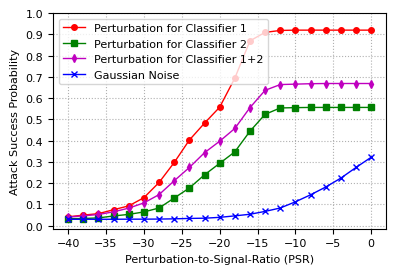

In [30]:
a1FNN =  [0.042, 0.05, 0.057, 0.0755, 0.0935, 0.132, 0.2035, 0.2975, 0.403, 0.4825, 0.5575, 0.694, 0.8695, 0.9095, 0.9185, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92]
a2FNN =  [0.0335, 0.034, 0.037, 0.046, 0.0535, 0.065, 0.0835, 0.1305, 0.1775, 0.2395, 0.2935, 0.3475, 0.4445, 0.524, 0.554, 0.5555, 0.5565, 0.5565, 0.5565, 0.5565, 0.5565]
a3FNN =  [0.041, 0.0465, 0.053, 0.0655, 0.083, 0.1075, 0.1465, 0.2115, 0.274, 0.3435, 0.3975, 0.4575, 0.5555, 0.637, 0.664, 0.666, 0.668, 0.669, 0.669, 0.669, 0.669]
a4FNN =  [0.0305, 0.0305, 0.0305, 0.0305, 0.031, 0.031, 0.0315, 0.0325, 0.0345, 0.0355, 0.0395, 0.0465, 0.054, 0.0675, 0.0835, 0.1125, 0.1455, 0.182, 0.224, 0.274, 0.322]

fig = plt.figure()
# plt.title('Attack on Classifier 1')
plt.plot(range(dBrange , 1, 2), a1FNN, 'ro-', label = 'Perturbation for Classifier 1')
plt.plot(range(dBrange , 1, 2), a2FNN, 'gs-', label = 'Perturbation for Classifier 2')
plt.plot(range(dBrange , 1, 2), a3FNN, 'md-', label = 'Perturbation for Classifier 1+2')
plt.plot(range(dBrange , 1, 2), a4FNN, 'bx-', label = 'Gaussian Noise')
plt.legend(loc="upper left")
# plt.legend(bbox_to_anchor=(0.01, 0.01), loc="lower left", borderaxespad=0)
plt.xlabel('Perturbation-to-Signal-Ratio (PSR)')
plt.ylabel('Attack Success Probability')
plt.grid(linestyle='dotted')
aa = plt.xticks(np.arange(dBrange,0+0.1, 5)) 
bb = plt.yticks(np.arange(0,1+0.1, 0.1)) 
plt.savefig('attack_on_class1FNN_updated.pdf') 